# **Habib-Aidara**
Data Scientist:

---



---



# **ACP et Clustering**

# **1. Importation des donées et Manipulation**

In [ ]:
#Monter mon Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Charement des biblotheques necessaires
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# **Chargement des données**

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/stat/breast_cancer.csv', sep=';', index_col= 'id_sample')
data.head()

,NAT1,BIRC5,BAG1,BCL2,BLVRA,CCNB1,CCNE1,CDC6,CDC20,CDH3,...,GPR160,UBE2T,CXXC5,ANLN,CEP55,ACTR3B,MLPH,NUF2,TMEM45B,pam50
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01A,7.100449,3.361004,3.972581,4.145669,4.765233,4.788987,2.164814,2.633598,4.131205,0.133455,...,4.150233,4.106918,5.528618,3.073409,2.669860,1.928460,5.567999,2.536764,0.213597,luminal-A
TCGA-3C-AALI-01A,3.453640,4.501040,2.720929,1.493020,5.823480,5.281003,2.535437,2.734157,4.176553,0.110023,...,5.561226,5.648057,4.711309,3.881110,3.357553,1.168684,7.064176,3.124620,3.946538,HER2-enriched
TCGA-3C-AALJ-01A,4.455574,4.164643,3.911511,4.191457,5.987255,5.229446,2.267963,3.379961,4.592752,0.236786,...,2.859309,5.213461,6.152875,2.697093,2.599436,1.177678,5.222420,3.053335,0.281303,luminal-B
TCGA-3C-AALK-01A,4.297961,3.920234,3.688335,3.894904,5.211594,4.014641,0.951107,1.472950,3.806552,0.062392,...,3.063807,4.166154,5.612184,2.645664,2.448027,1.026535,6.225590,1.717959,3.289543,luminal-A
TCGA-4H-AAAK-01A,1.695378,2.950846,4.110014,3.572843,4.317856,3.772768,1.103958,2.338953,3.473484,0.098773,...,3.289418,3.437585,4.299617,2.068516,2.152652,1.513181,5.485277,1.537125,2.976903,luminal-A


Le dataframe contient les niveaux d’expression de 50 gènes (NAT1, BIRC5, BAG1, etc.) dans différents échantillons (effectif total n=1016). La dernière colonne nommée **pam50** contient le sous-type moléculaire du cancer du sein, mesuré pour chaque échantillon. Quatre sous-types moléculaires sont disponibles : **luminal-A**, **luminal-B**, **HER2-enriched** et **basal-like**. Le cancer du sein de type *luminal-A* a généralement un bon pronostic pour les patients. En revanche, le cancer du sein de type *basal-like* a souvent un pronostic sombre.

# **Data Manipulation**

In [ ]:
#Dimension du DataFrame
print('Dimension Data', data.shape)

Dimension Data (1016, 51)


In [ ]:
#La nature des colones
data.dtypes

NAT1       float64
BIRC5      float64
BAG1       float64
BCL2       float64
BLVRA      float64
CCNB1      float64
CCNE1      float64
CDC6       float64
CDC20      float64
CDH3       float64
CENPF      float64
EGFR       float64
ERBB2      float64
ESR1       float64
FGFR4      float64
FOXC1      float64
GRB7       float64
FOXA1      float64
KRT5       float64
KRT14      float64
KRT17      float64
MAPT       float64
MDM2       float64
MKI67      float64
MMP11      float64
MYBL2      float64
MYC        float64
PGR        float64
RRM2       float64
SFRP1      float64
TYMS       float64
MIA        float64
EXO1       float64
PTTG1      float64
MELK       float64
NDC80      float64
KIF2C      float64
UBE2C      float64
ORC6       float64
SLC39A6    float64
PHGDH      float64
GPR160     float64
UBE2T      float64
CXXC5      float64
ANLN       float64
CEP55      float64
ACTR3B     float64
MLPH       float64
NUF2       float64
TMEM45B    float64
pam50       object
dtype: object

In [ ]:
#Verification des valeurs manquantes
data.isnull().sum()

NAT1       0
BIRC5      0
BAG1       0
BCL2       0
BLVRA      0
CCNB1      0
CCNE1      0
CDC6       0
CDC20      0
CDH3       0
CENPF      0
EGFR       0
ERBB2      0
ESR1       0
FGFR4      0
FOXC1      0
GRB7       0
FOXA1      0
KRT5       0
KRT14      0
KRT17      0
MAPT       0
MDM2       0
MKI67      0
MMP11      0
MYBL2      0
MYC        0
PGR        0
RRM2       0
SFRP1      0
TYMS       0
MIA        0
EXO1       0
PTTG1      0
MELK       0
NDC80      0
KIF2C      0
UBE2C      0
ORC6       0
SLC39A6    0
PHGDH      0
GPR160     0
UBE2T      0
CXXC5      0
ANLN       0
CEP55      0
ACTR3B     0
MLPH       0
NUF2       0
TMEM45B    0
pam50      0
dtype: int64

# Pas de valeurs manquantes

Afficher le nombre d'échantillons dans chaque sous-type moléculaire en utilisant la méthode `groupby` de pandas.

In [ ]:
data.groupby(data['pam50']).size()

pam50
HER2-enriched     82
basal-like       190
luminal-A        543
luminal-B        201
dtype: int64

<Axes: xlabel='pam50'>

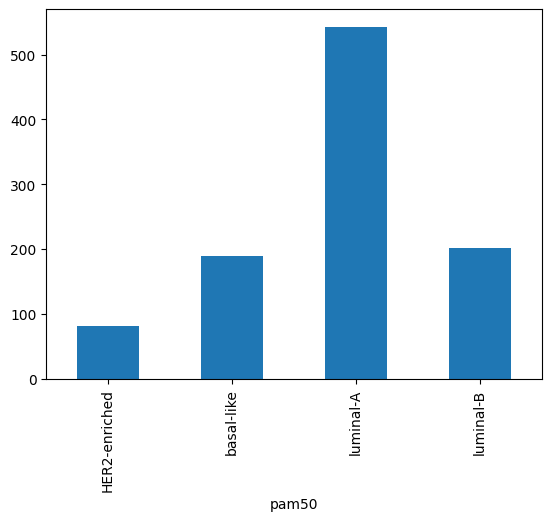

In [ ]:
#Afficher les echantillon sous forme  d'histogramme
data.groupby(data['pam50']).size().plot(kind='bar')

# **Interpretation:**
## On peut remarquer que les données ne sont pas distribuées de la façon homogène selon le type de cancer.

### En effet, le cancer du sein de type *luminal-A* survient plus fréquemment dans la population générale par rapport aux autres sous-types moléculaires de ce cancer.

# **2. Séparer les données d’expression et les étiquettes**

## Pour réaliser le calcul sur les données d’expression, il nous sera plus pratique de séparer les valeurs numériques des expressions de gènes et les étiquettes des sous-types moléculaires *pam50* dans deux objets différents.

### En suivant la nomenclature standard acceptée dans `scikit-learn`, on nommera **X** la matrice de données d’expression et **y** les étiquettes correspondantes.

In [ ]:
#Données d'expression de 50 gènes
X = data.select_dtypes('number')
print('X', X.shape)

X (1016, 50)


In [ ]:
#Données Etiquettés correspondantes (sous-types moléculaires)
y = data.select_dtypes('object')
#y= data['pam50']
print('y', y.shape)

y (1016, 1)


# **3. Afficher les valeurs d'expression**

<Axes: ylabel='Expression'>

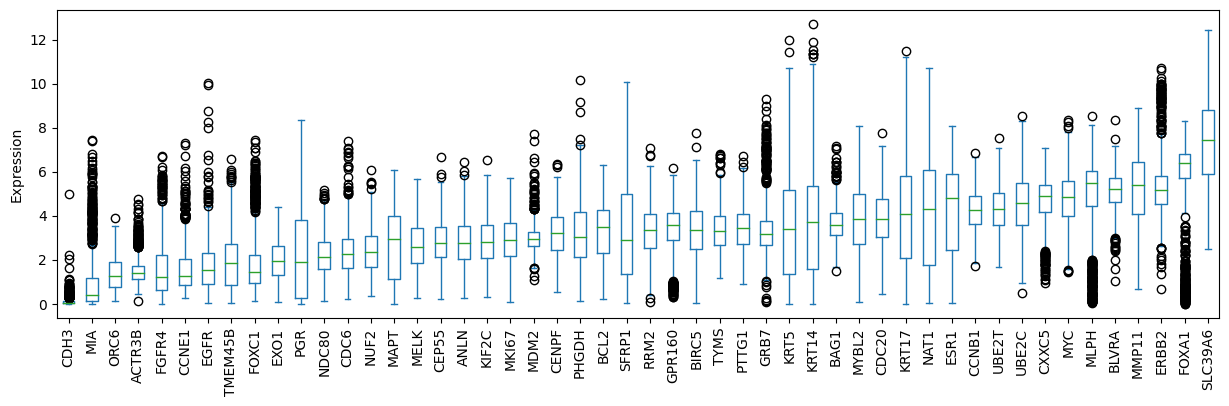

In [ ]:
sort_by_mean = X.mean().sort_values(ascending= True)

X[sort_by_mean.index].plot(kind = 'box', figsize = (15,4),rot=90, ylabel= 'Expression')



# **Interpretation:**
### Pour certains gènes les niveaux d’expression varient beaucoup, pour d’autres non. Les plages de valeurs sont différentes d’un gène à l’autre. Cette situation peut impacter fortement l’analyse en composantes principales (ACP) qui est principalement basée sur la variance. Les gènes avec une forte variance absolue auront plus de poids dans l’analyse que ceux avec une faible variance. Pour cette raison, **les données doivent être obligatoirement normalisées (standardisées)** avant l’analyse.

# **4. Appliquer une normalisation centrée-réduite aux données**

### La normalisation (standardisation) centrée-réduite consiste à soustraire la moyenne et à diviser par l'écart-type les valeurs d'expression. On peut la réaliser avec l’objet `StandardScaler` de la librairie `scikit-learn`.

In [ ]:
from os import X_OK
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Instancier l'objet scaler
X_scaled = scaler.fit_transform(X)  # Normalisation centre réduite
X_scaled= pd.DataFrame(X_scaled, columns= X.columns, index= X.index) #conversion de X_scaled en DataFrame

##Les valeurs d'expression sont ramenées à la même échelle après une normalisation centrée-réduite. La moyenne d’expression de chaque gène est égale à 0 et l'écart type est égal à 1.

In [ ]:
X_scaled.head(1)

,NAT1,BIRC5,BAG1,BCL2,BLVRA,CCNB1,CCNE1,CDC6,CDC20,CDH3,...,PHGDH,GPR160,UBE2T,CXXC5,ANLN,CEP55,ACTR3B,MLPH,NUF2,TMEM45B
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01A,1.29124,-0.0146,0.368308,0.663246,-0.421755,0.597896,0.478073,0.254353,0.159815,0.053345,...,-0.153922,0.691431,-0.187133,0.813166,0.226498,-0.139654,0.636733,0.378402,0.130143,-1.338842


<Axes: ylabel='Expression'>

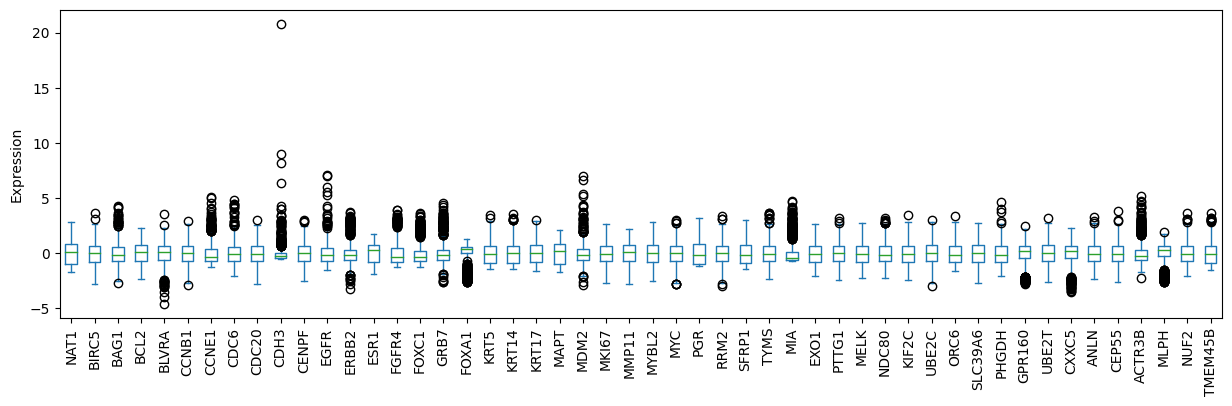

In [ ]:
#Afficher sous forme de Histogramme la normalisation
X_scaled.plot(kind = 'box', figsize= (15, 4), rot = 90, ylabel= 'Expression')

# **5. Faire une analyse en composantes principales (ACP)**

In [ ]:
from sklearn.decomposition import PCA

# **5.1  Calcul de l'ACP**

# Pour calculer une ACP, on utilise les données standardisées **X_scaled**.

In [ ]:
pca = PCA() #instacier l'objet pca
X_pca= pca.fit_transform(X_scaled) #appliqué ACP sur les données X_scaled

# Il est plus pratique de convertir le résultat de l'ACP **X_pca** en dataframe pandas, en précisant les noms de colonnes : de *PC1* à *PC50*.

In [ ]:
pca_columns = ['PC'+ str(c) for c in range(1,X_pca.shape[1]+1, 1)]
X_pca= pd.DataFrame(X_pca, index = X.index, columns= pca_columns)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01A,-0.826271,-3.433650,-2.510632,0.738305,-1.069998,-0.526869,0.826776,1.402600,-0.712689,-1.873343,...,-0.294489,-0.239547,0.079559,-0.104298,-0.378077,0.083779,-0.163103,0.172791,0.028911,0.017975
TCGA-3C-AALI-01A,2.902839,-3.922170,6.698382,-1.531670,-0.138620,-0.431154,0.519937,-0.732733,-0.720277,-0.500913,...,-0.012068,0.320612,0.340675,0.188449,-0.423823,0.002814,-0.493395,0.676903,-0.099423,0.227992
TCGA-3C-AALJ-01A,0.869263,-3.749200,-0.434459,0.689772,1.928451,-0.534292,-0.280851,1.430496,-0.582105,-0.381386,...,0.001786,-0.225937,0.140912,-0.055719,-0.039554,-0.188600,-0.085266,0.329374,-0.467050,0.271044
TCGA-3C-AALK-01A,-1.765921,0.760450,1.339832,-2.331983,0.074528,0.138779,-0.411600,0.352907,0.126035,0.530383,...,0.122736,-0.214867,0.415538,0.085572,0.213560,-0.346038,0.108832,-0.087644,-0.019231,-0.172559
TCGA-4H-AAAK-01A,-2.017120,1.740945,1.163439,-1.385725,0.171750,-0.465903,-2.096529,1.139202,1.572573,-0.886130,...,-0.084215,0.077875,0.005870,0.045677,0.005480,-0.185906,-0.033933,-0.050316,0.082190,0.107746


# **5.2 Calcul de la variance expliquée**

# Les valeurs de la variance expliquée par composante sont disponibles dans l’attribut `pca.explained_variance_ratio_` après le calcul de l'ACP.

In [ ]:
pca.explained_variance_ratio_

array([0.4141211 , 0.1399058 , 0.06153661, 0.04304336, 0.03228112,
       0.02948981, 0.02137533, 0.01932914, 0.01927726, 0.01648891,
       0.01537033, 0.01345515, 0.01179742, 0.01091564, 0.01032152,
       0.00954922, 0.00895897, 0.00852771, 0.00772808, 0.00720844,
       0.00692966, 0.00656934, 0.0064256 , 0.00572167, 0.00549796,
       0.00520188, 0.00488695, 0.004677  , 0.00435519, 0.00405197,
       0.00376135, 0.00360729, 0.00322888, 0.00311163, 0.00295957,
       0.00278843, 0.00275436, 0.0025318 , 0.00243809, 0.00232694,
       0.00216209, 0.00200786, 0.00189123, 0.00173565, 0.00162586,
       0.001574  , 0.00132835, 0.00118083, 0.00108477, 0.00090288])

# On peut les convertir en objet `Series` de pandas et présenter les valeurs en pourcentage.

In [ ]:
explained_variance = pd.Series(dict(zip(X_pca.columns, 100*pca.explained_variance_ratio_)))
explained_variance.head()

PC1    41.412110
PC2    13.990580
PC3     6.153661
PC4     4.304336
PC5     3.228112
dtype: float64

<Axes: ylabel='Explained variance'>

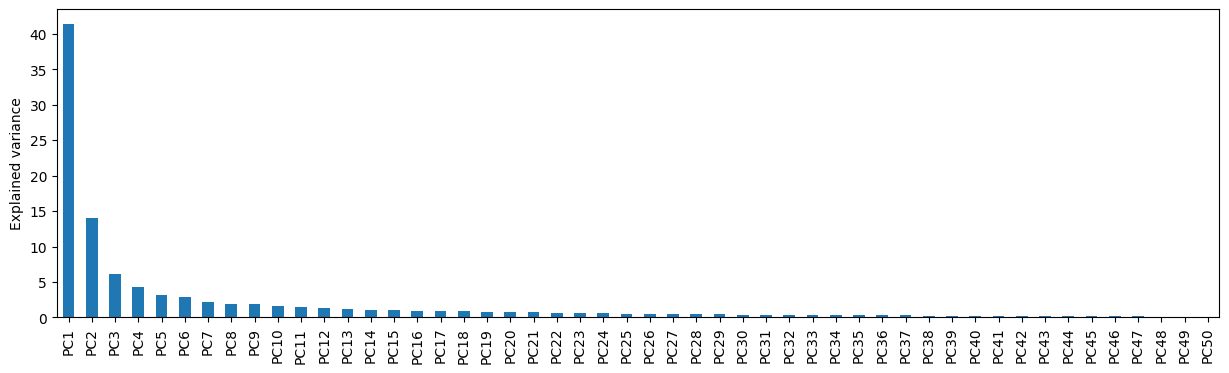

In [ ]:
explained_variance.plot(kind = 'bar', figsize = (15, 4), rot = 90, ylabel = 'Explained variance')

In [ ]:
explained_variance['PC1'] + explained_variance['PC2']

55.40268954758619

##Les deux premières composantes de l'ACP expliquent **55.4%** de la variance.


# On peut voir que le premier composantes et le second representent la moitié de l'information

In [ ]:
explained_variance['PC1'] + explained_variance['PC2'] + explained_variance['PC3']

61.55635074623892

##Les trois premières composantes de l'ACP expliquent **61.6%** de la variance.

# **5.3 Visualisation des deux premières composantes principales de l’ACP**

<Axes: xlabel='PC1', ylabel='PC2'>

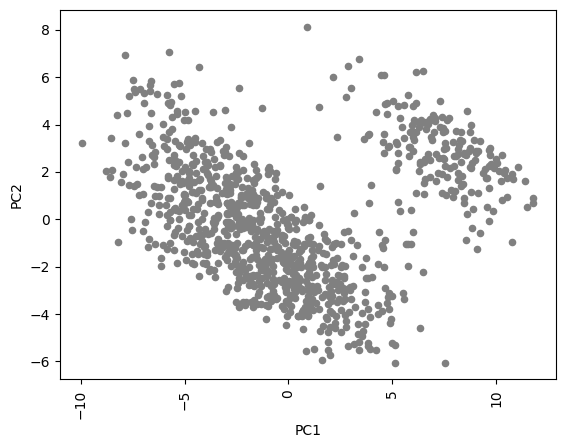

In [ ]:
X_pca.plot(x = 'PC1', y = 'PC2', kind= 'scatter', rot= 90, color = 'gray')

### Les points se rassemblent naturellement en clusters, notamment deux clusters sont nettement visibles. Présentons chaque sous-type moléculaire en différente couleur pour comprendre à quoi correspondent ces clusters.

<Axes: xlabel='PC1', ylabel='PC2'>

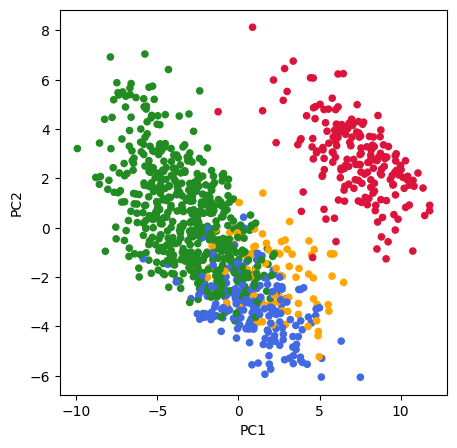

In [ ]:
dict_colors = {'luminal-A': 'forestgreen', 'luminal-B': 'royalblue', 'HER2-enriched': 'orange', 'basal-like': 'crimson'}
y_colors = [dict_colors[yi] for yi in data['pam50']]
X_pca.plot(x='PC1', y='PC2', kind='scatter', figsize=(5, 5), color=y_colors)

# **5.4 Visualisation des trois premières composantes principales de l’ACP**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

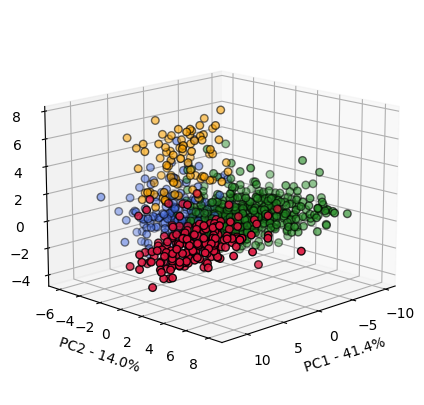

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_pca['PC1'], X_pca['PC2'], X_pca['PC3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('PC1 - ' + '{:.1f}%'.format(explained_variance['PC1']))
ax.set_ylabel('PC2 - ' + '{:.1f}%'.format(explained_variance['PC2']))
ax.set_zlabel('PC3 - ' + '{:.1f}%'.format(explained_variance['PC3']))
ax.view_init(elev =15, azim= 45)

# **Réaliser un clustering hiérarchique**

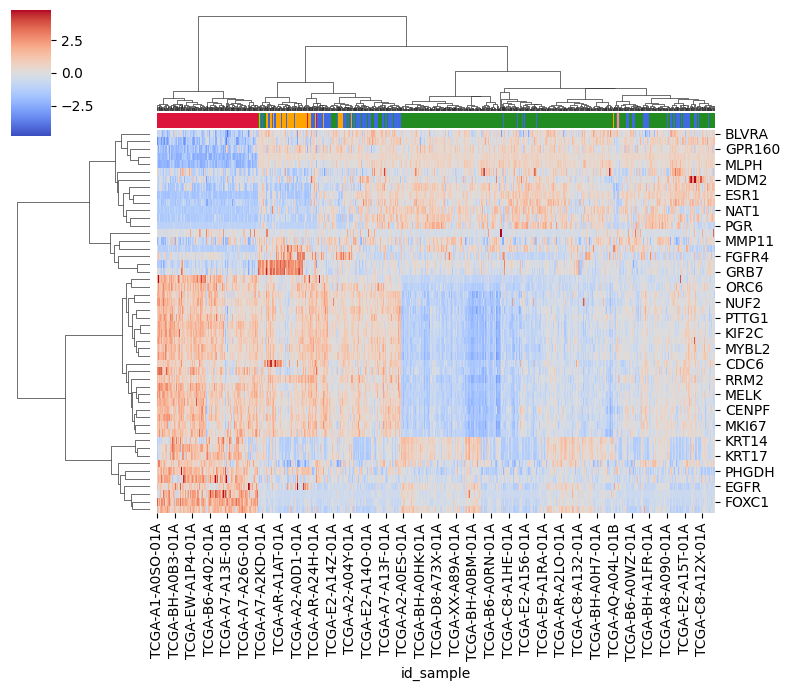

In [ ]:
%matplotlib inline
import seaborn as sns
metric = 'euclidean'
method = 'ward'
cmap = 'coolwarm'


clustergrid = sns.clustermap(X_scaled.T, figsize=(8, 7), metric=metric, method=method, cmap=cmap,
                             row_cluster=True, col_cluster=True, col_colors=y_colors,
                             center=0.0, vmin=-4.8, vmax=4.8)

# **Sauvegarder la figure dans un fichier**

In [ ]:
fig = clustergrid.fig
fig.savefig('/content/drive/MyDrive/stat/hierarchical_clustering.png', dpi=300, format='png', bbox_inches='tight')